In [ ]:
# IPL Analysis Jupyter Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load data
matches = pd.read_csv('01_data\\raw\\matches.csv')
deliveries = pd.read_csv('01_data\\raw\\deliveries.csv')

In [4]:
# Preprocessing
matches['year'] = pd.to_datetime(matches['date']).dt.year

In [5]:
print(matches.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [14]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,2008


In [6]:
print(deliveries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [13]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [8]:
# Q0: Number of unique teams and their names
all_teams = pd.concat([matches['team1'], matches['team2'], matches['winner']]).dropna().unique()
print(f"Total number of unique IPL teams: {len(all_teams)}")
print("Team names:")
for team in sorted(all_teams):
    print(team)

Total number of unique IPL teams: 19
Team names:
Chennai Super Kings
Deccan Chargers
Delhi Capitals
Delhi Daredevils
Gujarat Lions
Gujarat Titans
Kings XI Punjab
Kochi Tuskers Kerala
Kolkata Knight Riders
Lucknow Super Giants
Mumbai Indians
Pune Warriors
Punjab Kings
Rajasthan Royals
Rising Pune Supergiant
Rising Pune Supergiants
Royal Challengers Bangalore
Royal Challengers Bengaluru
Sunrisers Hyderabad


In [10]:
a_teams = list(all_teams)
print(a_teams
      )

['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiants', 'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans', 'Royal Challengers Bengaluru']


In [16]:
teams_map = {'Royal Challengers Bangalore':'bangalore'
              , 'Kings XI Punjab':'punjab'
              , 'Delhi Daredevils':'delhi'
              , 'Mumbai Indians':'mumbai'
              , 'Kolkata Knight Riders':'kolkata'
              , 'Rajasthan Royals':'rajasthan'
              , 'Deccan Chargers':'hyderabad'
              , 'Chennai Super Kings':'chennai'
              , 'Kochi Tuskers Kerala':'kerala'
              , 'Pune Warriors':'pune'
              , 'Sunrisers Hyderabad':'hyderabad'
              , 'Gujarat Lions':'gujarat'
              , 'Rising Pune Supergiants':'pune'
              , 'Rising Pune Supergiant':'pune'
              , 'Delhi Capitals':'delhi'
              , 'Punjab Kings':'punjab'
              , 'Lucknow Super Giants':'lucknow'
              , 'Gujarat Titans':'gujarat'
              , 'Royal Challengers Bengaluru':'bangalore'
}

In [6]:
# Q1: Total number of players
all_players = pd.concat([deliveries['batter'], deliveries['non_striker'], deliveries['bowler']])
total_players = all_players.nunique()
print(f"Total number of players: {total_players}")

Total number of players: 732


In [7]:
# Q2: Number of Batsmen
batsmen = deliveries['batter'].nunique()
print(f"Number of Batsmen: {batsmen}")

Number of Batsmen: 673


In [8]:
# Q3: Number of Bowlers
bowlers = deliveries['bowler'].nunique()
print(f"Number of Bowlers: {bowlers}")

Number of Bowlers: 530


In [9]:
# Q4: Number of All-rounders
bat_set = set(deliveries['batter'].unique())
bowl_set = set(deliveries['bowler'].unique())
all_rounders = bat_set.intersection(bowl_set)
print(f"Number of All rounders: {len(all_rounders)}")

Number of All rounders: 471


In [11]:
# Q5: Team winning most home matches after winning toss
home_win_toss = matches[(matches['toss_winner'] == matches['team1']) &
                        (matches['winner'] == matches['team1'])]
home_wins = home_win_toss['team1'].value_counts()
print("Team with most home wins after winning toss:")
print(home_wins.head(5))

Team with most home wins after winning toss:
team1
Chennai Super Kings            33
Mumbai Indians                 33
Kolkata Knight Riders          29
Royal Challengers Bangalore    26
Rajasthan Royals               21
Name: count, dtype: int64


In [13]:
# Q6: Team winning most home matches after losing toss
home_lose_toss = matches[(matches['toss_winner'] != matches['team1']) &
                         (matches['winner'] == matches['team1'])]
home_wins_lost_toss = home_lose_toss['team1'].value_counts()
print("Team with most home wins after losing toss:")
print(home_wins_lost_toss.head(5))

Team with most home wins after losing toss:
team1
Chennai Super Kings            42
Royal Challengers Bangalore    40
Mumbai Indians                 37
Kolkata Knight Riders          36
Rajasthan Royals               34
Name: count, dtype: int64


In [20]:
# Q7: Away match winners by year
away_wins = matches[matches['team2'] == matches['winner']]
away_wins_per_year = away_wins.groupby(['year', 'winner']).size().reset_index(name='wins')
print("Assumed Away (team2) Wins Each Year:")
print(away_wins_per_year)


Assumed Away (team2) Wins Each Year:
     year                       winner  wins
0    2008          Chennai Super Kings     5
1    2008              Deccan Chargers     2
2    2008             Delhi Daredevils     3
3    2008              Kings XI Punjab     4
4    2008        Kolkata Knight Riders     2
..    ...                          ...   ...
139  2024               Mumbai Indians     2
140  2024                 Punjab Kings     5
141  2024             Rajasthan Royals     7
142  2024  Royal Challengers Bengaluru     3
143  2024          Sunrisers Hyderabad     3

[144 rows x 3 columns]


In [21]:
# Super over typically starts from 3rd inning onwards
super_over_ids = deliveries[deliveries['inning'] > 2]['match_id'].unique()
super_over_matches = matches[matches['id'].isin(super_over_ids)]
super_over_per_year = super_over_matches.groupby('year').size().reset_index(name='Super Overs')
print("Super Over Matches Each Year:")
print(super_over_per_year)


Super Over Matches Each Year:
   year  Super Overs
0  2009            1
1  2010            1
2  2013            2
3  2014            1
4  2015            1
5  2017            1
6  2019            2
7  2020            4
8  2021            1


In [22]:
# Q1: Number of Matches Played
total_matches = matches.shape[0]
print(f"Total matches played: {total_matches}")

Total matches played: 1095


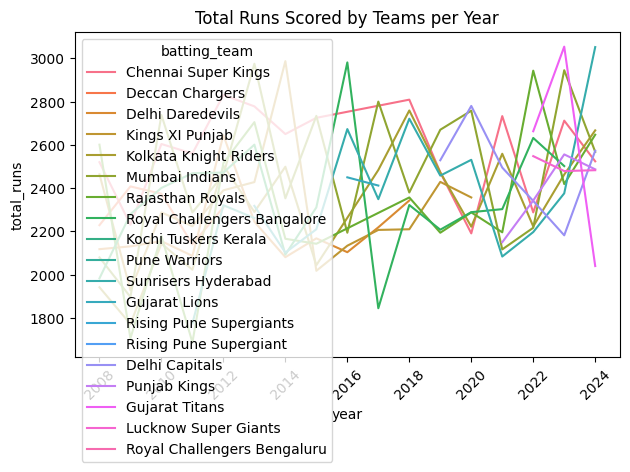

In [23]:
# Q10: Total runs scored by each team per year
deliveries_with_year = deliveries.merge(matches[['id', 'year']], left_on='match_id', right_on='id')
total_runs_yearly = deliveries_with_year.groupby(['year', 'batting_team'])['total_runs'].sum().reset_index()
sns.lineplot(data=total_runs_yearly, x='year', y='total_runs', hue='batting_team')
plt.title('Total Runs Scored by Teams per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

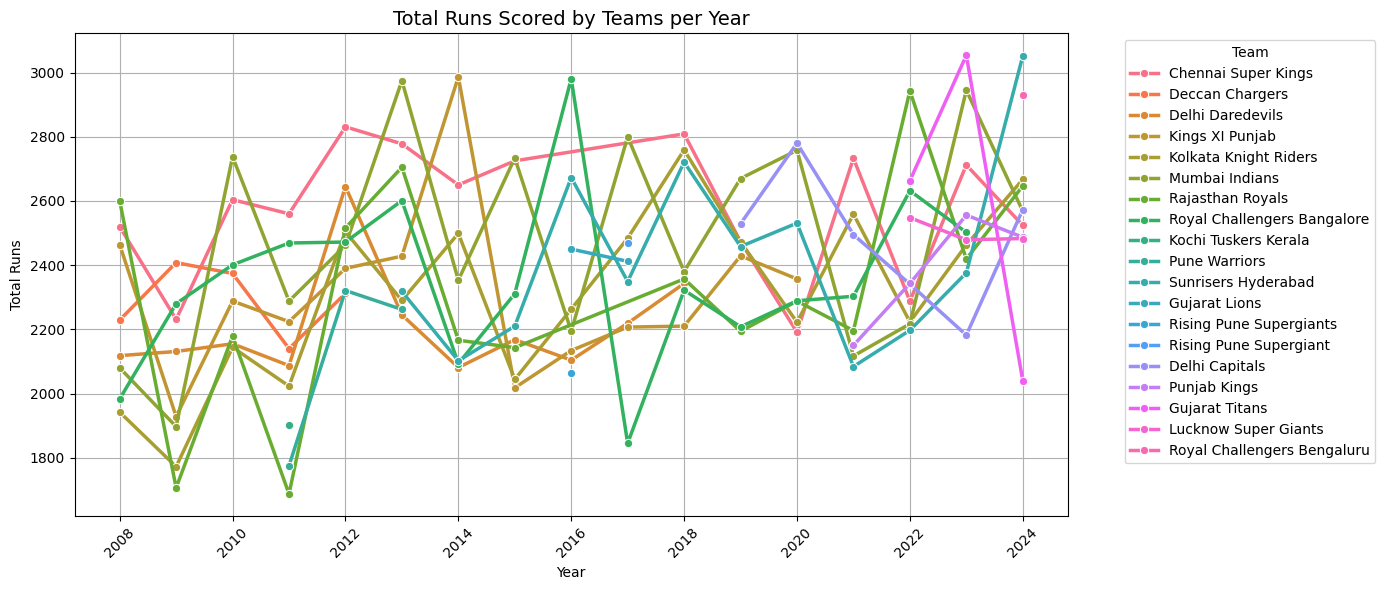

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=total_runs_yearly, x='year', y='total_runs', hue='batting_team', marker='o', linewidth=2.5)
plt.title('Total Runs Scored by Teams per Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


     year                 batting_team  total_runs
6    2008             Rajasthan Royals        2601
9    2009              Deccan Chargers        2408
21   2010               Mumbai Indians        2738
24   2011          Chennai Super Kings        2560
34   2012          Chennai Super Kings        2831
47   2013               Mumbai Indians        2975
54   2014              Kings XI Punjab        2987
64   2015               Mumbai Indians        2734
74   2016  Royal Challengers Bangalore        2981
80   2017               Mumbai Indians        2800
84   2018          Chennai Super Kings        2809
96   2019               Mumbai Indians        2670
101  2020               Delhi Capitals        2780
108  2021          Chennai Super Kings        2733
123  2022             Rajasthan Royals        2943
128  2023               Gujarat Titans        3054
145  2024          Sunrisers Hyderabad        3052


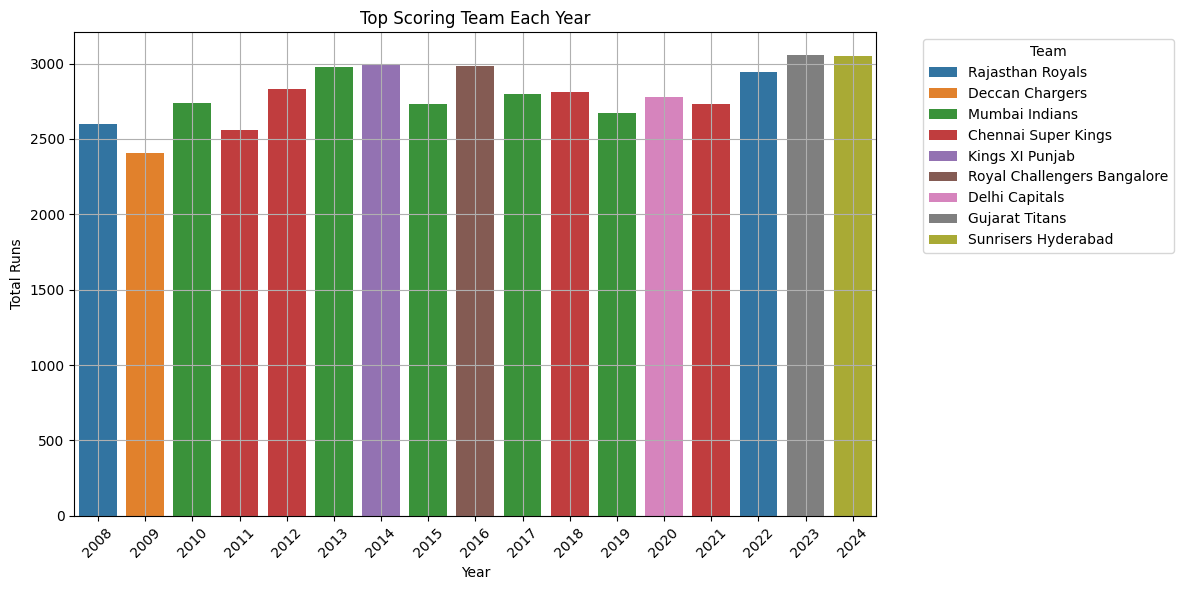

In [26]:
# Merge year info into deliveries
deliveries_with_year = deliveries.merge(matches[['id', 'year']], left_on='match_id', right_on='id')

# Group by year and team, sum the total runs
total_runs_yearly = deliveries_with_year.groupby(['year', 'batting_team'])['total_runs'].sum().reset_index()

# Sort by year and total runs to get top team first in each year
sorted_runs = total_runs_yearly.sort_values(['year', 'total_runs'], ascending=[True, False])

# Get the top scoring team per year
top_team_each_year = sorted_runs.groupby('year').head(1)

# Display the data
print(top_team_each_year)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_team_each_year, x='year', y='total_runs', hue='batting_team')

plt.title('Top Scoring Team Each Year')
plt.xlabel('Year')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

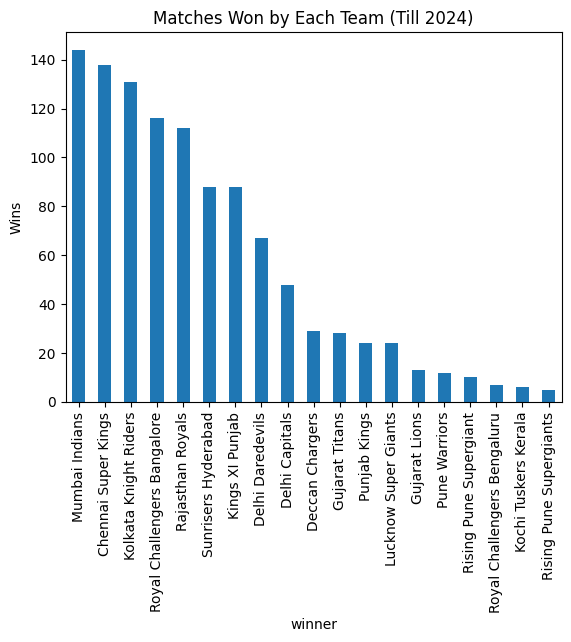

In [27]:
# Q11: Maximum number of matches won by each team till 2024
team_wins = matches['winner'].value_counts()
team_wins.plot(kind='bar', title='Matches Won by Each Team (Till 2024)')
plt.ylabel('Wins')
plt.show()

In [29]:
# Additional: Total number of unique venues
unique_venues = matches['venue'].nunique()
print(f"Total number of unique venues IPL matches were played at: {unique_venues}")

Total number of unique venues IPL matches were played at: 58


In [32]:
# Q12: Matches played in each venue
df_venue_counts = matches['venue'].value_counts()
print("Matches played in each venue:")
print(df_venue_counts)

Matches played in each venue:
venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai            

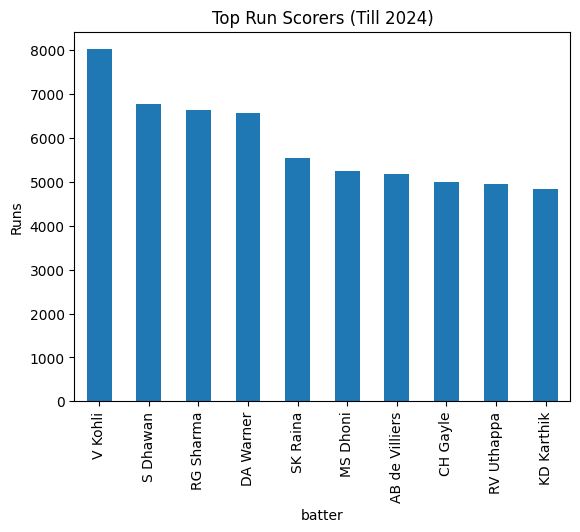

In [33]:
# Q13: Most runs by a player till 2024
top_batters = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_batters.plot(kind='bar', title='Top Run Scorers (Till 2024)')
plt.ylabel('Runs')
plt.show()

In [34]:
# Q14: Highest run scorer each year
yearly_batters = deliveries_with_year.groupby(['year', 'batter'])['batsman_runs'].sum().reset_index()
top_each_year = yearly_batters.sort_values(['year', 'batsman_runs'], ascending=[True, False]).groupby('year').head(1)
print("Top scorer each year:")
print(top_each_year)

Top scorer each year:
      year         batter  batsman_runs
115   2008       SE Marsh           616
229   2009      ML Hayden           572
446   2010   SR Tendulkar           618
502   2011       CH Gayle           608
684   2012       CH Gayle           733
910   2013     MEK Hussey           733
1088  2014     RV Uthappa           660
1148  2015      DA Warner           562
1383  2016        V Kohli           973
1422  2017      DA Warner           641
1594  2018  KS Williamson           735
1694  2019      DA Warner           692
1866  2020       KL Rahul           676
2051  2021     RD Gaikwad           635
2144  2022     JC Buttler           863
2423  2023   Shubman Gill           890
2606  2024        V Kohli           741


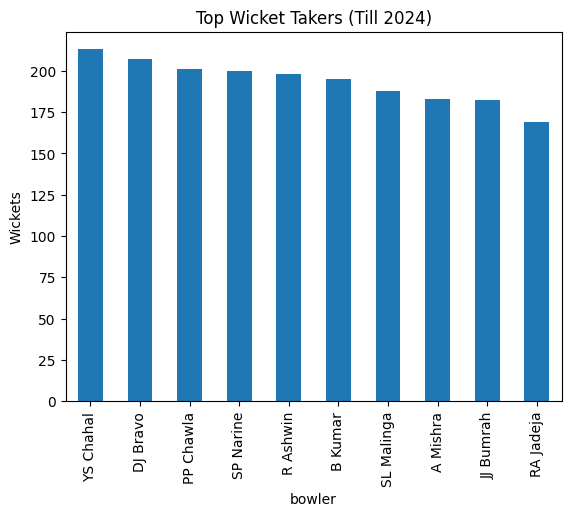

In [35]:
# Q15: Most wickets till 2024
wickets = deliveries[deliveries['player_dismissed'].notnull()]
most_wickets = wickets.groupby('bowler').size().sort_values(ascending=False).head(10)
most_wickets.plot(kind='bar', title='Top Wicket Takers (Till 2024)')
plt.ylabel('Wickets')
plt.show()

In [36]:
# Q16: Highest wicket taker each year
yearly_wickets = deliveries_with_year[deliveries_with_year['player_dismissed'].notnull()]
yearly_wkts = yearly_wickets.groupby(['year', 'bowler']).size().reset_index(name='wickets')
top_wkts_year = yearly_wkts.sort_values(['year', 'wickets'], ascending=[True, False]).groupby('year').head(1)
print("Top wicket taker each year:")
print(top_wkts_year)

Top wicket taker each year:
      year         bowler  wickets
77    2008  Sohail Tanvir       24
157   2009       RP Singh       26
248   2010        PP Ojha       22
375   2011     SL Malinga       30
447   2012       M Morkel       30
519   2013       DJ Bravo       34
650   2014      MM Sharma       26
708   2015       DJ Bravo       28
791   2016        B Kumar       24
879   2017        B Kumar       28
962   2018         AJ Tye       28
1077  2019       K Rabada       29
1161  2020       K Rabada       32
1232  2021       HV Patel       35
1402  2022      YS Chahal       29
1469  2023      MM Sharma       31
1542  2024       HV Patel       30


In [37]:
# Q17: Maximum runs conceded in an over
worst_over = deliveries.groupby(['match_id', 'over', 'bowler'])['total_runs'].sum().reset_index()
worst_over_sorted = worst_over.sort_values(by='total_runs', ascending=False).head(5)
print("Worst overs (max runs conceded):")
print(worst_over_sorted)

Worst overs (max runs conceded):
       match_id  over          bowler  total_runs
32158   1254076    19        HV Patel          37
8581     501247     2  P Parameswaran          37
34286   1304060    15         DR Sams          35
5702     419139    12       RS Bopara          33
17587    734047     5         P Awana          33


In [38]:
# Q18: Most economical bowler (min 15 matches)
bowler_stats = deliveries.groupby('bowler').agg(
    balls=('ball', 'count'),
    runs=('total_runs', 'sum'),
    matches=('match_id', pd.Series.nunique)
)
bowler_stats['economy'] = bowler_stats['runs'] / (bowler_stats['balls'] / 6)
bowler_stats = bowler_stats[bowler_stats['matches'] >= 15].sort_values('economy').head(10)
print("Most economical bowlers (min 15 matches):")
print(bowler_stats[['economy']])

Most economical bowlers (min 15 matches):
                   economy
bowler                    
A Kumble          6.646999
M Muralitharan    6.698292
J Yadav           6.738693
SP Narine         6.761216
RE van der Merwe  6.791209
DW Steyn          6.791411
DL Vettori        6.833121
Rashid Khan       6.907963
J Botha           6.922426
MJ Santner        6.940541


In [39]:
# View basic info
print(matches.head())
print(matches.info())

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner  ...   result  \
0        Kolkat

In [40]:
print(deliveries.head())
print(deliveries.info())

   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0

In [41]:
batter_stats = (
    deliveries_with_year.groupby(['year', 'batter'])
    .agg({'batsman_runs': 'sum', 'ball': 'count'})
    .reset_index()
)
batter_stats['strike_rate'] = (batter_stats['batsman_runs'] / batter_stats['ball']) * 100
print(batter_stats.sort_values('strike_rate', ascending=False).head())

      year           batter  batsman_runs  ball  strike_rate
997   2014         AN Ahmed             4     1   400.000000
2203  2022        PN Mankad             4     1   400.000000
719   2012  J Syed Mohammad             4     1   400.000000
954   2013         RV Gomez             4     1   400.000000
1711  2019         I Sharma            10     3   333.333333


In [42]:
# Q19: Batter strike rate with at least 10 matches and 10+ balls faced per match
deliveries_with_year['ball_count'] = 1
batter_match_stats = deliveries_with_year.groupby(['batter', 'match_id']).agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball_count', 'sum')
).reset_index()

# Filter players who faced at least 10 balls in a match
batter_match_stats = batter_match_stats[batter_match_stats['balls_faced'] >= 10]

# Count qualifying matches per batter
qualified_matches = batter_match_stats.groupby('batter').size().reset_index(name='matches_played')

# Aggregate total runs and balls faced across those matches
total_stats = batter_match_stats.groupby('batter').agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('balls_faced', 'sum')
).reset_index()

# Merge both to compute strike rate
batter_sr = pd.merge(total_stats, qualified_matches, on='batter')
batter_sr = batter_sr[batter_sr['matches_played'] >= 10]
batter_sr['strike_rate'] = (batter_sr['total_runs'] / batter_sr['total_balls']) * 100
print("Top strike rates (min 10 matches with min 10 balls each):")
print(batter_sr.sort_values('strike_rate', ascending=False).head(10))

Top strike rates (min 10 matches with min 10 balls each):
             batter  total_runs  total_balls  matches_played  strike_rate
381     Rashid Khan         362          203              12   178.325123
464         TM Head         737          419              15   175.894988
424       SP Narine        1223          698              34   175.214900
325         PD Salt         634          364              14   174.175824
27       AD Russell        2315         1346              68   171.991085
459        TH David         587          349              21   168.194842
156       H Klaasen         928          563              23   164.831261
237  LS Livingstone         856          526              23   162.737643
295        N Pooran        1646         1020              46   161.372549
140     Dhruv Jurel         300          186              10   161.290323
